In [1]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:

# загружаем набор данных
data = pd.read_csv('C://Users/alex1/Downloads/netflix1.csv')
data_copy = data.copy()
data_copy.head()
#Посмотрел датафрейм

show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [3]:
data_copy['date_added'] = pd.to_datetime(data_copy['date_added'])
data_copy.info()
# посмотрел какие данные в столбцах


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [4]:
data_copy.shape
# посмотрел размер датафрейма

(8790, 10)

In [5]:
data_copy = data_copy.drop_duplicates()
data_copy.shape
# проверка на дубликаты, с помощью фунекции удалил повторы, размер датафрейма не изменился
# дубликатов не обнаружено

(8790, 10)

<AxesSubplot: >

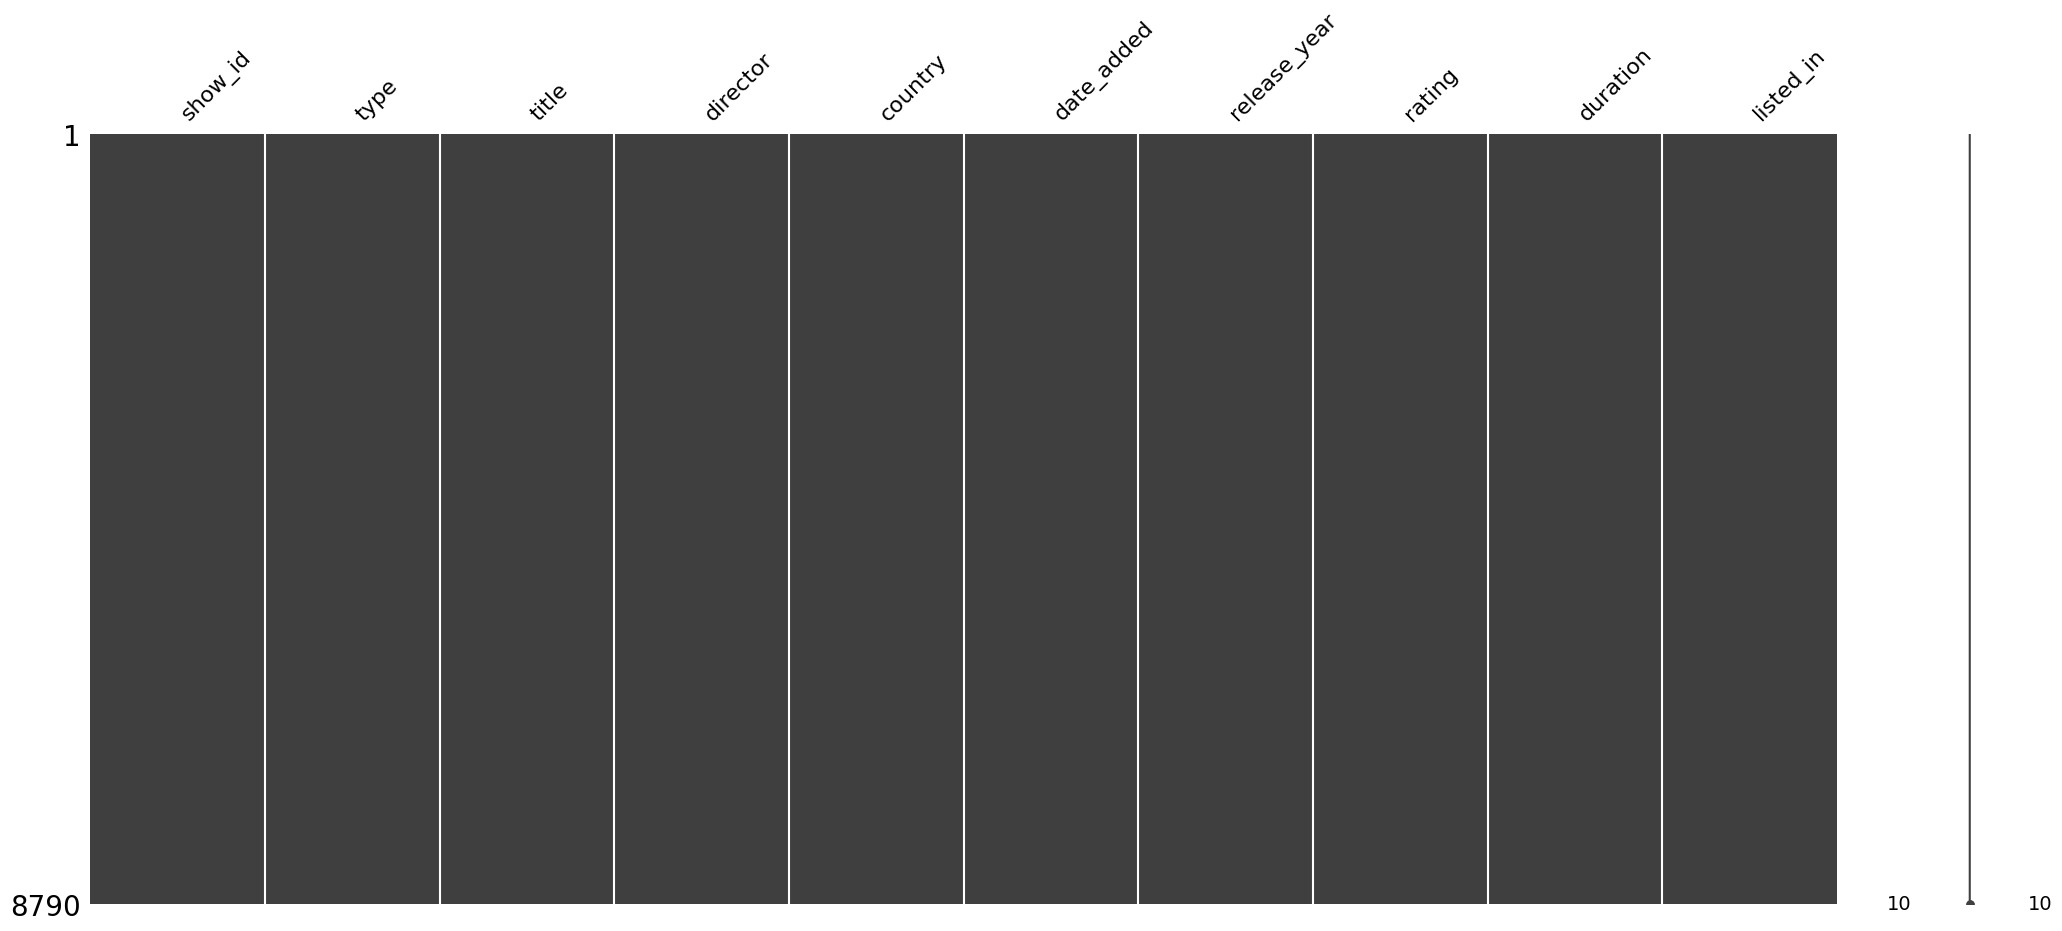

In [6]:
msn.matrix(data_copy)
#построил матрицу Null значений, нулевых значениц не обнаружено

In [4]:
label_endcoder = LabelEncoder()

train_copy = data_copy.copy()
train_copy['type'] = label_endcoder.fit_transform(train_copy['type'])
train_copy['country'] = label_endcoder.fit_transform(train_copy['country'])
train_copy['rating'] = label_endcoder.fit_transform(train_copy['rating'])
train_copy['listed_in'] = label_endcoder.fit_transform(train_copy['listed_in'])
train_copy

show_id  type                             title         director  \
0         s1     0              Dick Johnson Is Dead  Kirsten Johnson   
1         s3     1                         Ganglands  Julien Leclercq   
2         s6     1                     Midnight Mass    Mike Flanagan   
3        s14     0  Confessions of an Invisible Girl    Bruno Garotti   
4         s8     0                           Sankofa     Haile Gerima   
...      ...   ...                               ...              ...   
8785   s8797     1                        Yunus Emre        Not Given   
8786   s8798     1                         Zak Storm        Not Given   
8787   s8801     1                Zindagi Gulzar Hai        Not Given   
8788   s8784     1                              Yoko        Not Given   
8789   s8786     1                               YOM        Not Given   

      country date_added  release_year  rating   duration  listed_in  
0          80 2021-09-25          2020       4     90 min        273  
1          20 2021-09-24          2021       8   1 Season        241  
2          80 2021-09-24          2021       8   1 Season        498  
3           6 2021-09-22          2021       9     91 min        124  
4          80 2021-09-24          1993       8    125 min        318  
...       ...        ...           ...     ...        ...        ...  
8785       76 2017-01-17          2016       9  2 Seasons        411  
8786       80 2018-09-13          2016      11  3 Seasons        421  
8787       52 2016-12-15          2012       9   1 Season        393  
8788       52 2018-06-23          2016      10   1 Season        421  
8789       52 2018-06-07          2016      11   1 Season        421  

[8790 rows x 10 columns]

In [11]:
cor = train_copy.corr()
cor.style.background_gradient()
# построение корреляционной матрицы


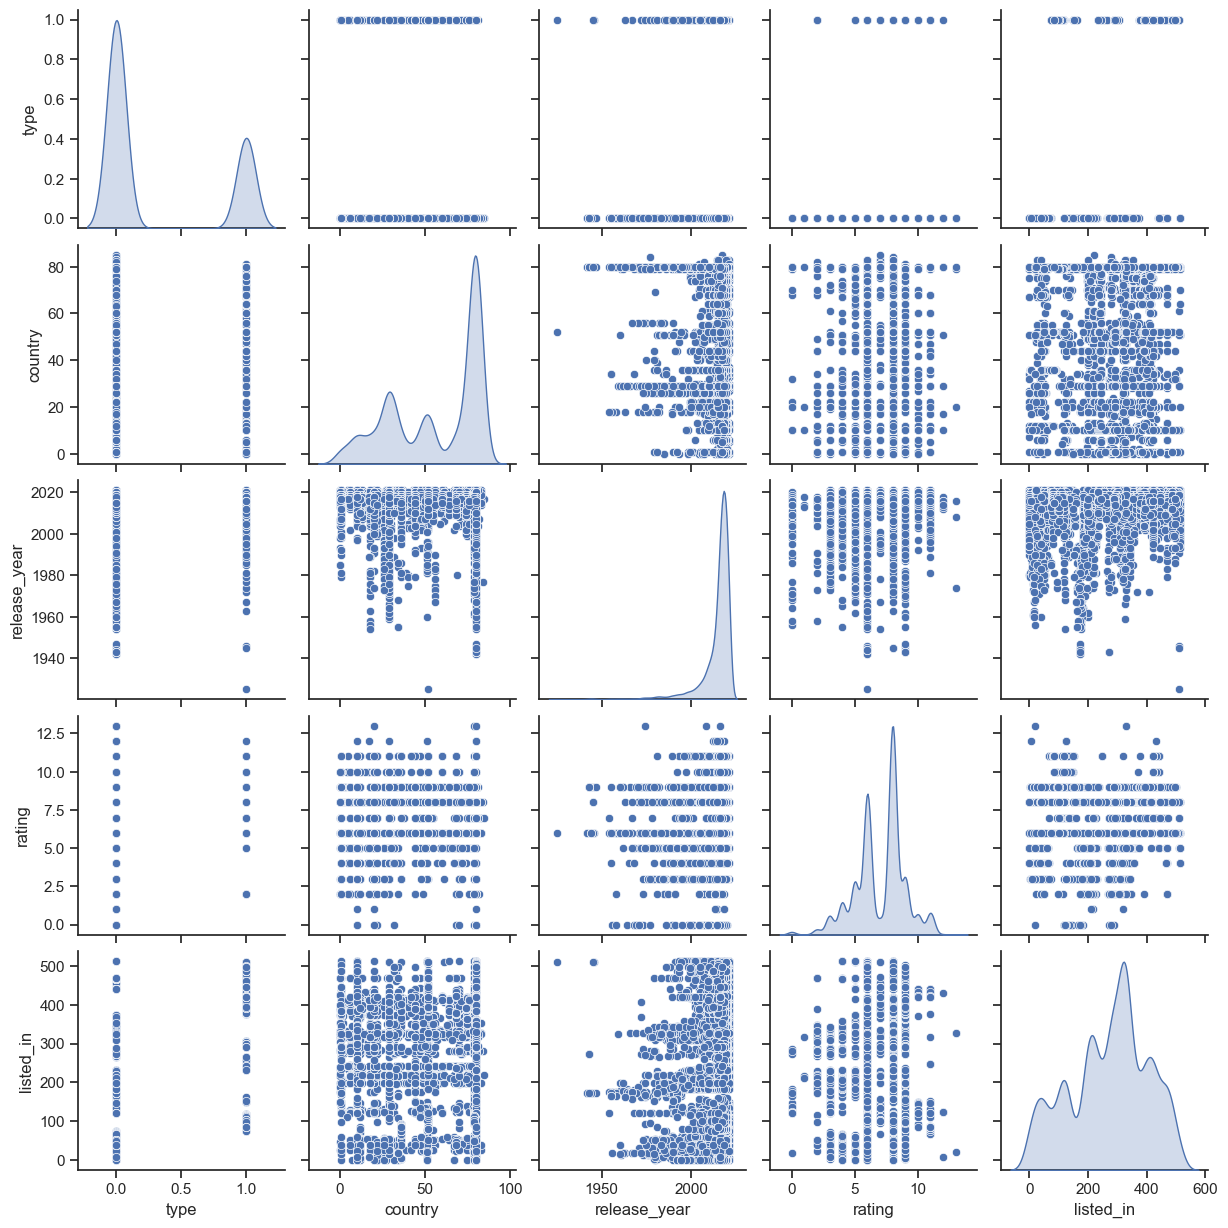

In [32]:
sns.set(style="ticks")
sns.pairplot(train_copy, diag_kind='kde')
plt.show()

In [33]:
ydata_profiling.ProfileReport(train_copy)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
data_copy.head()

show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [6]:
for column in data_copy.columns:
    nan_count = data_copy[column].isnull().sum()
    total_count = len(data_copy[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце show_id равен 0.0%
Процент NaN значений в столбце type равен 0.0%
Процент NaN значений в столбце title равен 0.0%
Процент NaN значений в столбце director равен 0.0%
Процент NaN значений в столбце country равен 0.0%
Процент NaN значений в столбце date_added равен 0.0%
Процент NaN значений в столбце release_year равен 0.0%
Процент NaN значений в столбце rating равен 0.0%
Процент NaN значений в столбце duration равен 0.0%
Процент NaN значений в столбце listed_in равен 0.0%


In [5]:
top_directors = data_copy[(data_copy['type'] == 'Movie') &(data_copy['director'] != 'Not Given')].groupby('director').size().reset_index(name='film_count')
top_directors = top_directors.sort_values(by='film_count', ascending=False).head(10)
top_directors
# в топе самых часто снимающих фильмов режжисеров на первом месте 

director  film_count
3252           Rajiv Chilaka          19
3303  Raúl Campos, Jan Suter          18
3885             Suhas Kadav          16
2492            Marcus Raboy          15
1716               Jay Karas          14
661      Cathy Garcia-Molina          13
2562         Martin Scorsese          12
1713             Jay Chapman          12
4306         Youssef Chahine          12
3862        Steven Spielberg          11

In [8]:
top_directors = data_copy[(data_copy['type'] == 'TV Show') &(data_copy['director'] != 'Not Given') ].groupby('director').size().reset_index(name='film_count')
top_directors = top_directors.sort_values(by='film_count', ascending=False).head(10)
top_directors
# в топе самых часто снимающих сериалы режжисеров на первом месте 

director  film_count
5             Alastair Fothergill          14
135  Mark Thornton, Todd Kauffman           5
197                   Stan Lathan           3
108                     Ken Burns           2
190                   Shin Won-ho           2
74                 Iginio Straffi           2
72                    Hsu Fu-chun           2
180               Rob Seidenglanz           2
161              Padraic McKinley           1
152       Nopparoj Chotmunkongsit           1

In [7]:
top_categories = data_copy[data_copy['type'] == 'TV Show']['listed_in'].value_counts()
top_10_categories = top_categories.head(10)
top_10_categories
# составил топ самых популярных категорий среди сериалов

Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
Name: listed_in, dtype: int64

In [6]:
top_categories = data_copy[data_copy['type'] == 'Movie']['listed_in'].value_counts()
top_10_categories = top_categories.head(10)
top_10_categories
# составил топ самых популярных категорий среди фильмов

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64

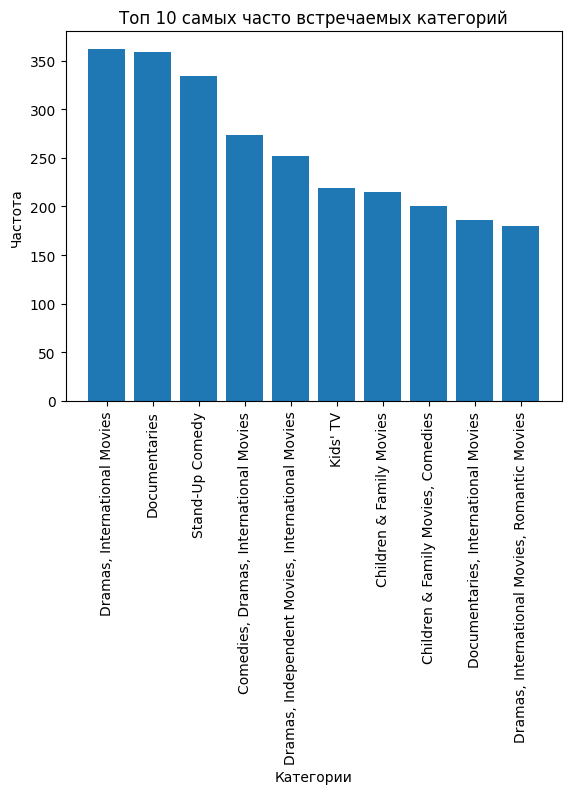

In [10]:
top_categories = data_copy['listed_in'].value_counts()
top_categories = top_categories.head(10)
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Категории')
plt.ylabel('Частота')
plt.title('Топ 10 самых часто встречаемых категорий')
plt.xticks(rotation=90)  # Поворот подписей по оси X для удобства чтения
plt.show()
# построил график популярности по фильмам и сериалам

In [22]:
# загружаем набор данных
movie_df = pd.read_csv('C://Users/alex1/Downloads/Netflix_Dataset_Movie.csv')
rating_df = pd.read_csv('C://Users/alex1/Downloads/Netflix_Dataset_Rating.csv')

merged_df = pd.merge(movie_df, rating_df, on='Movie_ID')
#Посмотрел датафрейм
grouped_df = merged_df.groupby('Name')['Rating'].mean().reset_index()
grouped_df
# использовал два другиг датасета, при этом в одном были названия фильмов, а в другом были их рейтинги
# создал один общий датафрэйм по общему ключу Movie_id, дальше сгруппировал по фильмам и составил рейтинг
# потому что в первом датасете хранились оценки 17297 пользователей, на основе этих данных составил датасет

Name    Rating
0                                              10  3.113049
1                      10 Things I Hate About You  3.703471
2     101 Dalmatians II: Patch's London Adventure  3.528282
3                                           11:14  3.260153
4                                       13 Ghosts  3.595732
...                                           ...       ...
1337                                      Yojimbo  4.021298
1338                         Young Black Stallion  3.259422
1339                                   Youngblood  3.273667
1340                         Yu-Gi-Oh!: The Movie  3.192789
1341                                        Zorro  3.308292

[1342 rows x 2 columns]

In [11]:
top_categories = grouped_df.sort_values(by = ['Rating'], ascending=False)
top_10_categories = top_categories.head(10)
top_10_categories
# составил топ самых рейтинговых фильмов и сериалов

Name    Rating
588                                  Lost: Season 1  4.665432
1162                         The Simpsons: Season 6  4.589824
337           Family Guy: Freakin' Sweet Collection  4.520766
863                        Six Feet Under: Season 4  4.461601
512                                       Inu-Yasha  4.457774
903                         Stargate SG-1: Season 8  4.456026
965                     The Best of Friends: Vol. 4  4.449168
1217                        The West Wing: Season 3  4.436258
587   Lord of the Rings: The Fellowship of the Ring  4.431489
409                         Gilmore Girls: Season 3  4.428943

In [12]:
top_categories = grouped_df.sort_values(by = ['Rating'])
top_10_categories = top_categories.head(10)
top_10_categories
# составил топ самых плохих фильмов и сериалов по оценкам пользователей

Name    Rating
475                            House of the Dead  1.962031
881                                  Spice World  2.101550
399                                        Gerry  2.203597
373                          Freddy Got Fingered  2.217361
316                          Ernest Goes to Jail  2.221938
291                            Dr. T & the Women  2.253770
230                               Cop and a Half  2.275073
905  Starship Troopers 2: Hero of the Federation  2.282493
957                                 The Avengers  2.321699
204        Children of the Corn 4: The Gathering  2.334944

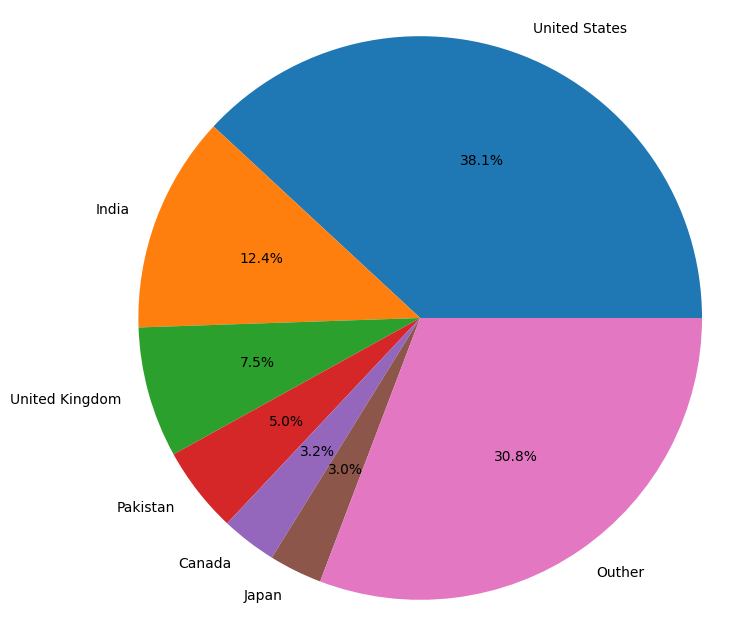

In [8]:
plt.figure(figsize=(8, 8))

data = data_copy[data_copy['country'] != 'Not Given']['country'].value_counts()
label = data.index
sizes = data.values

labels = {label[i]: sizes[i] for i in range(len(sizes))}

outher = 0
ss = []
for name, val in labels.items():
    if val/sum(sizes)*100 <= 2.6:
        outher += val
        ss.append(name)
for i in ss:
    del labels[i]
labels['Outher']  = outher
# Отображение круговой диаграммы

plt.pie(list(labels.values()), labels=list(labels.keys()), autopct='%1.1f%%')
plt.axis('equal')




# Показать круговую диаграмму
plt.show()

In [15]:
data_copy[data_copy['date_added']== min(data_copy['date_added'])] 
#вывод самого первого фильма, который был добавлен в этом датафрэйме

show_id   type                 title              director  \
4253   s5958  Movie  To and From New York  Sorin Dan Mihalcescu   

            country date_added  release_year rating duration  \
4253  United States 2008-01-01          2006  TV-MA   81 min   

                                  listed_in  
4253  Dramas, Independent Movies, Thrillers

In [14]:
data_copy[data_copy['date_added']== max(data_copy['date_added'])] 
#вывод самого последнего фильма, который был добавлен в этом датафрэйме

show_id   type                 title         director        country  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   

  date_added  release_year rating duration      listed_in  
0 2021-09-25          2020  PG-13   90 min  Documentaries